In [ ]:
import numpy as np
from PIL import Image
from scipy import signal
import cv2
from google.colab.patches import cv2_imshow

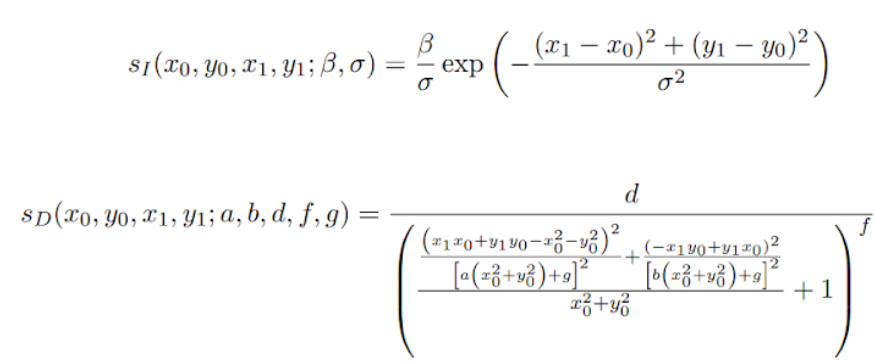

In [ ]:
#Defined parameters:
beta = 0.826
theta = 1.063
d = 1.175
b = -0.000007427
alpha = -0.00001514
f = 2.127
g = 0.758
#Image plane coordinates of an infinitesimal area element affected by that flux (iterate in loops to create shift-invariant kernel)
x1 = 0
y1 = 0
#Image plane coordinates of an infinitesimal area element emitting flux (assuming center of 10x10)
x0 = 2
y0 = 2

In [ ]:
#Parametric Model function definition:
sI = (beta/theta)**(-((x1-x0)**2 + (y1-y0)**2) / theta**2)
sD = d / (( ((( (x1*x0 + y1*y0 - x0**2 - y0**2)**2)/(alpha*(x0**2 + y0**2)+g)**2 + ((-x1*y0 + y1*x0)**2)/(b*(x0**2 + y0**2)+g)**2))/(x0**2+y0**2))+1)**f

In [ ]:
#Generate shift-invariant PSF kernel.
import numpy as np
PSF = np.zeros((5, 5))

for x1 in range (0,5):
  for y1 in range (0,5):
    sI = (beta/theta)**(-((x1-x0)**2 + (y1-y0)**2) / theta**2)
    sD = d / ((((((x1*x0 + y1*y0 - x0**2 - y0**2)**2)/(alpha*(x0**2 + y0**2)+g)**2 + ((-x1*y0 + y1*x0)**2)/(b*(x0**2 + y0**2)+g)**2))/(x0**2+y0**2))+1)**f
    PSF[x1][y1] = sI + sD

psf_kernel = PSF
psf_kernel = PSF/sum(PSF)
psf_kernel = 0.1*psf_kernel

In [ ]:
def convolution2D(input_img, kernel):

  convolved_img = np.zeros(shape=(input_img.shape[0], input_img.shape[1]))
  zeros_padd = int(len(kernel)/2)
  new_width = input_img.shape[0] + zeros_padd
  new_height = input_img.shape[1] + zeros_padd
  padded_img = cv2.copyMakeBorder(input_img, zeros_padd, zeros_padd, zeros_padd, zeros_padd, cv2.BORDER_CONSTANT,value=0)

  for i in range(input_img.shape[0]):
    for j in range(input_img.shape[1]):
        convolved_img[i][j] = np.sum(np.multiply(padded_img[i:i+len(kernel), j:j+len(kernel)], kernel))

  cv2_imshow(convolved_img)

  return convolved_img

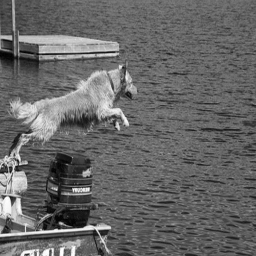

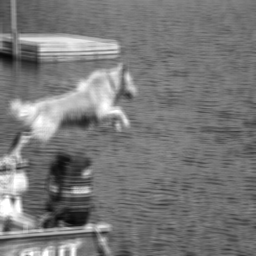

True

In [ ]:
ideal_img = cv2.imread('deflared_img.jpg', 0)
canvas_size = (256, 256)
ideal_img = cv2.resize(ideal_img, canvas_size, interpolation = cv2.INTER_AREA)
cv2_imshow(ideal_img)

blurred_img = convolution2D(ideal_img, psf_kernel)
#blurred_img = signal.convolve2d(ideal_img, psf_kernel, boundary='symm', mode="same")
#cv2_imshow(blurred_img)
cv2_imshow(blurred_img)
cv2.imwrite('blurred_face.jpg', blurred_img)